<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Indonesia_Resource_Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
data=("/content/drive/My Drive/Colab Notebooks/Indonesia Resource Mapping/ML.xlsx")

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/Indonesia Resource Mapping'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/drive/My Drive/Colab Notebooks/Indonesia Resource Mapping/BL.xlsx
/content/drive/My Drive/Colab Notebooks/Indonesia Resource Mapping/BB.xlsx
/content/drive/My Drive/Colab Notebooks/Indonesia Resource Mapping/PB.xlsx
/content/drive/My Drive/Colab Notebooks/Indonesia Resource Mapping/ML.xlsx


In [5]:
df=pd.read_excel(data)

In [6]:
df.head(10)

,potensi,nama_provinsi,nama_kabupaten,Komoditas,tahun,total_sd,total_cad,total_sd_2,total_cad_2
0,Mineral Logam,Aceh,Aceh Barat,Air Raksa,2015,0.0,32250000,1987-03-01 00:00:00,0.00
1,Mineral Logam,Aceh,Aceh Barat,Air Raksa,2016,0.0,32250000,1987-03-01 00:00:00,0.00
2,Mineral Logam,Aceh,Aceh Barat,Air Raksa,2017,0.0,32250000,387,0.00
3,Mineral Logam,Aceh,Aceh Barat,Air Raksa,2018,0.0,32250000,1987-03-01 00:00:00,0.00
4,Mineral Logam,Kalimantan Barat,Kapuas Hulu,Air Raksa,2015,0.0,4881.5,72.04,0.00
5,Mineral Logam,Kalimantan Barat,Kapuas Hulu,Air Raksa,2016,0.0,4881.5,72.04,0.00
6,Mineral Logam,Kalimantan Barat,Kapuas Hulu,Air Raksa,2017,0.0,4881.5,3478.99,0.00
7,Mineral Logam,Kalimantan Barat,Kapuas Hulu,Air Raksa,2018,0.0,4881.5,72.04,0.00
8,Mineral Logam,Kalimantan Barat,Kapuas Hulu,Antimon,2017,3958633.0,3958633,0,15834.53
9,Mineral Logam,Kalimantan Barat,Kapuas Hulu,Antimon,2018,3958633.0,4070421.255,15834.53,15834.53


In [11]:
fig = px.bar(df,
             y='Komoditas',
             x='total_sd',
             orientation='h',
             color='nama_provinsi',
             title='Indonesian Geological Resource',
             opacity=0.8,
             color_discrete_sequence=px.colors.diverging.Armyrose,
             template='plotly_dark'
            )
fig.update_xaxes(range=[0,35])
fig.show()

In [12]:
fig = px.bar(df,
             y='Komoditas',
             x='total_cad_2',
             orientation='h',
             color='nama_kabupaten',
             title='Indonesian Geological Resource',
             opacity=0.8,
             color_discrete_sequence=px.colors.diverging.balance,
             template='plotly_dark'
            )
fig.update_xaxes(range=[0,35])
fig.show()

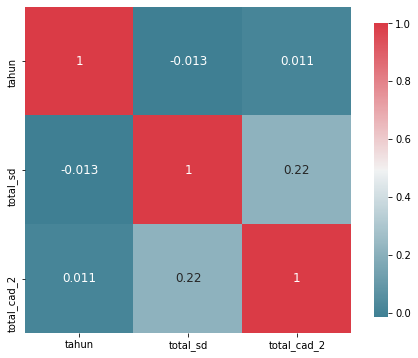

In [13]:


def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 8 , 6 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map(df) 



In [14]:


fig = px.line(df, x="Komoditas", y="total_cad", color_discrete_sequence=['green'], 
              title="Indonesian Geological Resource")
fig.show()



In [15]:
fig = px.bar(df, x= "Komoditas", y= "total_sd_2", color_discrete_sequence=['crimson'],)
fig.show()

In [18]:
cnt_srs = df['Komoditas'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'viridis',
        reversescale = True
    ),
)

layout = dict(
    title='Data',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Komoditas")

In [17]:
fig = px.pie(df, values=df['total_cad'], names=df['Komoditas'],
             title='Indonesian Geological Resource',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [19]:
fig = px.bar(df[['nama_provinsi','Komoditas']].sort_values('Komoditas', ascending=False), 
                        y = "Komoditas", x= "nama_provinsi", color='Komoditas', template='ggplot2')
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14))
fig.update_layout(title_text="Indonesian Geological Resource")

fig.show()

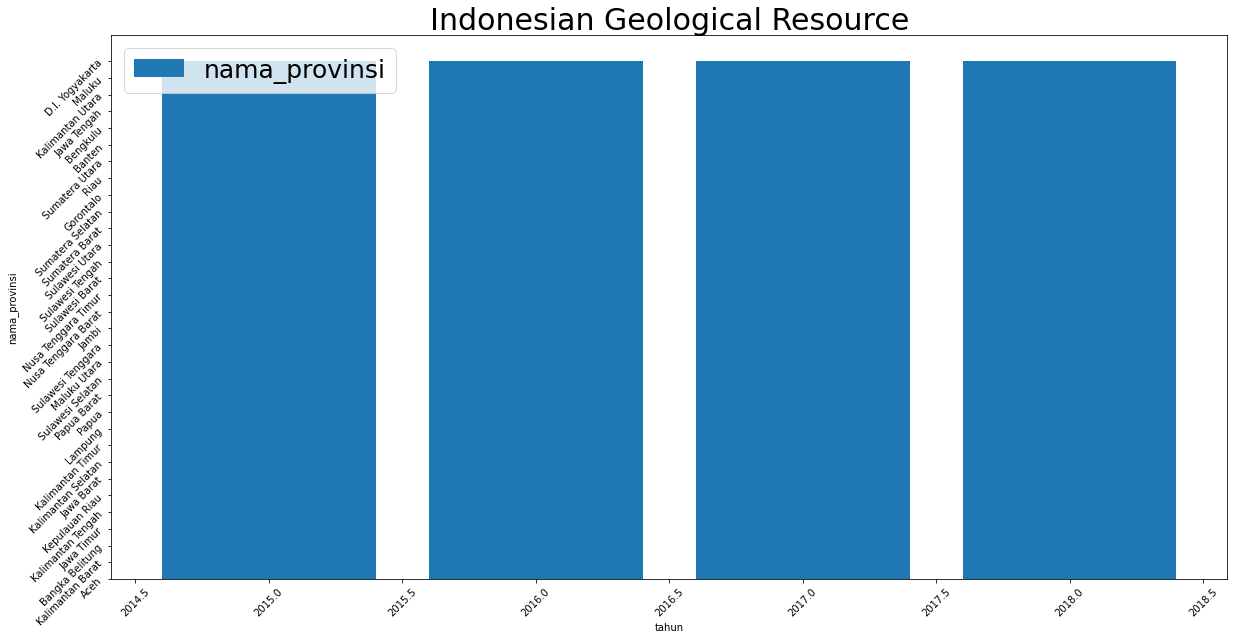

In [20]:
plt.figure(figsize=(20,10))
plt.bar(df.tahun, df.nama_provinsi,label="nama_provinsi")
plt.xlabel('tahun')
plt.ylabel("nama_provinsi")
plt.legend(frameon=True, fontsize=25)
plt.title('Indonesian Geological Resource',fontsize=30)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [21]:
import plotly.offline as pyo
import plotly.graph_objs as go
lowerdf = df.groupby('nama_provinsi').size()/df['nama_kabupaten'].count()*100
labels = lowerdf.index
values = lowerdf.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

In [22]:
fig = px.scatter(df, x="total_sd", y="Komoditas", color="nama_provinsi", marginal_y="rug", marginal_x="histogram")
fig

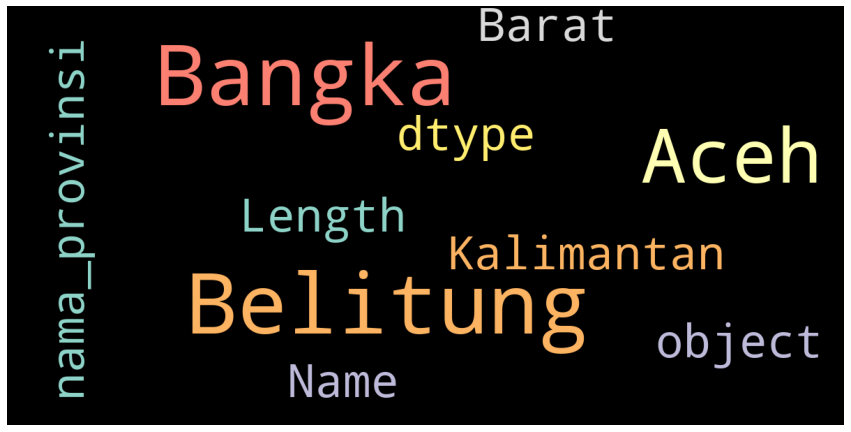

In [23]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        colormap='Set3',
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(df['nama_provinsi'])